In [0]:
import numpy as np
from pylab import *
from numpy import exp,sqrt
from numpy.linalg import inv

# ガウス過程回帰

## データ

In [0]:
train = np.array([ [-0.5,	0.7], [0.5,	1.8], [1,1.7], [1.4,	2.3], [3,1],[2.3,0],[2.5,0.2],[1.5,2],[1.1,2.4],[0.7,	1.5]])

In [0]:
xtrain = train.T[0]
ytrain = train.T[1]
N = len(ytrain)

## パラメータ

In [0]:
# plot parameters
xmin = -1
xmax = 3.5
ymin = -1
ymax = 3

In [0]:
# GP kernel parameters
eta   = 0.1
theta1 = 1.0
theta2 = 1.0

## カーネル

In [0]:
def gauss (x, x_d, theta1, theta2):
    return theta1 * np.exp (-(x - x_d)**2 / (2 * theta2 * theta2))

## カーネル行列計算
### 以下p.87 図3.17参照
### eq.3.82 & eq. 3.76

In [0]:
K = []
for n in range(N):
  for n_d in range(N):
    k = gauss(xtrain[n],xtrain[n_d], theta1, theta2)
    K.append(k)
K = np.array(K).reshape(N,N) + eta*np.eye(N)

In [0]:
K_inv = np.linalg.inv(K)
yy = np.dot(K_inv, ytrain)

In [0]:
xx = np.linspace(xmin, xmax,100)

In [0]:
M = len(xx)
Mu = []
Sigma = []

for m in range(M):
  k = []
  for n in range(N):
    #k*.T
    k_ = gauss(xtrain[n], xx[m], theta1, theta2)
    k.append(k_)
  k = np.array(k)
  #k**
  s = gauss(xx[m], xx[m], theta1, theta2) + eta 
  
  mu = np.dot(k, yy)
  sigma = s - k.dot(K_inv).dot(k)
  Mu.append(mu)
  Sigma.append(sigma)

## plot

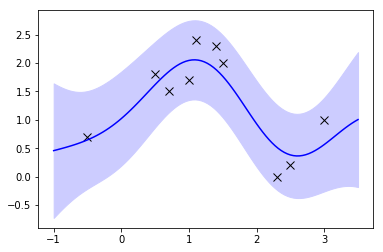

In [11]:
plt.figure()
plot (xtrain, ytrain, 'kx', markersize=8)
plot (xx, Mu, 'b-')
fill_between (xx, Mu - 2*sqrt(Sigma), Mu + 2*sqrt(Sigma), color='#ccccff')
show ()